# Algebra liniowa z zastosowaniami 1

## Projekt nr 1

Uzupełnij poniżej swoje dane i sprawdź czy wyświetlają się poprawnie:

In [ ]:
IMIE_NAZWISKO = ""

print(IMIE_NAZWISKO)

Przed dalszą pracą załadujmy bibliotekę Numpy i poprawmy czytelność wyników ustawiając szerokość wyświetlanych danych, tak aby nie było zawijania wierszy:

In [ ]:
import numpy as np
np.set_printoptions(linewidth=150)

### Wektory i macierze w sieciach neuronowych

Wektory i macierze stanowią wygodne kontenery do przechowywania danych oraz do wykonywania na nich obliczeń. Procesory i karty graficzne są przystosowane do realizacji wydajnych operacji na wektorach i macierzach, zatem jeśli jesteśmy w stanie wyrazić obliczenia w języku operacji wektor-macierz lub macierz-macierz, to możemy uzyskiwać wyniki w bardzo krótkim czasie. Operacje na wektorach i macierzach stanowią jeden z głównych fundamentów [sztucznych sieci neuronowych](https://en.wikipedia.org/wiki/Neural_network_(machine_learning)) i [głębokiego uczenia](https://en.wikipedia.org/wiki/Deep_learning), a możliwość szybkiego eksperymentowania (wynikającego z wydajnych obliczeń) jest jednym z motorów intensywnego postępu tej dziedziny [sztucznej inteligencji](https://en.wikipedia.org/wiki/Artificial_intelligence) i [uczenia maszynowego](https://en.wikipedia.org/wiki/Machine_learning).

W poniższych zadaniach zbudujemy proste modele neuronowe do predykcji typów kwiatów ze zbioru [Iris](https://en.wikipedia.org/wiki/Iris_flower_data_set). Podczas ich konstrukcji zastosujemy pewne uproszenia (np. pominiemy tzw. *bias*) oraz nie poruszymy zagadnień związanych z uczeniem modeli (są to zagadnienia związane z przedmiotami *Analiza matematyczna z zastosowaniami 2* oraz *Sztuczna inteligencja*). Głównym celem jest pokazanie w jaki sposób dane są zorganizowane przy pomocy macierzy i wektorów oraz jak sieci neuronowe realizują na nich operacje matematyczne.

Na początku wczytajmy dane:

In [ ]:
from sklearn.datasets import load_iris
iris_X, iris_Y = load_iris(return_X_y=True)

Zmienna `iris_X` jest macierzą (tablicą 2-wymiarową) i zawiera 150 kwiatów opisanych przez 4 cechy (długość i szerokość płatka oraz długość i szerokość kielicha; w centrymetrach). Poniżej znajduje się pierwszych dziesięć z nich oraz wymiary tej zmiennej:

In [ ]:
iris_X[:10]

In [ ]:
iris_X.shape

Zmienna `iris_Y` jest wektorem (tablicą 1-wymiarową), która przechowuje zakodowane informacje o typie danego kwiatu. Pierwsze 50 jest typu *setosa* (wartość `0`), kolejne 50 jest typu *versicolor* (wartość `1`), a ostatnie 50 jest typu *virginica* (wartość `2`). Poniżej znajduje się po 10 wartości każdego typu oraz wymiary tablicy:

In [ ]:
print(iris_Y[0:10])
print(iris_Y[50:60])
print(iris_Y[100:110])

In [ ]:
iris_Y.shape

#### Pojedynczy perceptron

Na początku zaimplementujemy naprostszy model neuronowy, tj. [perceptron](https://en.wikipedia.org/wiki/Perceptron) będący sztucznym neuronem, który stanowi model biologicznego neuronu.

Neuron biologiczny składa się z jednego ciała komórki, wielu dendrytów i pojedynczego aksonu. Połączenia między neuronami to synapsy. Neuron otrzymuje bodźce poprzez dendryty, a w przypadku dostatecznego bodźca, neuron aktywuje się i wysyła bodźce do aksonu, który przekazuje sygnał dalej do innych neuronów mających połączenia z pobudzonym neuronem. Sygnały mogą być pobudzające lub hamujące, tj. niektóre sygnały mogą zapobiec aktywacji neuronu (zamiast spowodować jego aktywację).

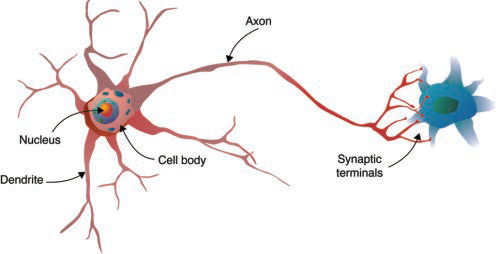

(źródło: Glassner, A., *Deep Learning: From Basics to Practice*, The Imaginary Institute, 2018)

Perceptron składa się z wielu wejść powiązanych wagami z jednostką obliczeniową; dodatkowo składa się z pojedynczego wyjścia:

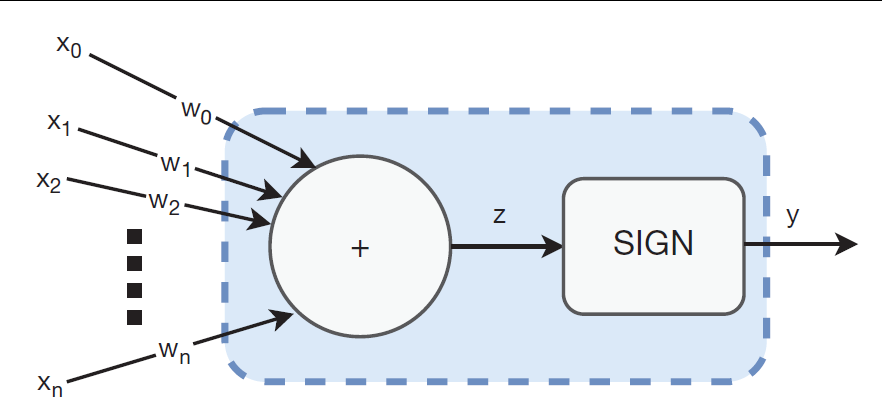

(źródło, mod.: Ekman, M., *Learning Deep Learning*, Nvidia, 2022)

Wejścia zwykle oznacza się jako $x_0, x_1, \ldots, x_n$ a wyjście jako $y$. Wejścia i wyjście w luźny sposób odpowiadają dendrytom i aksonowi. Każde wejście ma odpowiadającą jej wagę $w_0, w_1, \ldots, w_n$. Wyjście perceptronu przyjmuje wartość albo -1, albo 1. Każda wartość wejściowa $x_i$ jest mnożona przez odpowiadającą jej wagę $w_i$, następnie są one wysyłane do jednostki obliczeniowej (jest to luźny odpowiadnik ciała komórki neuronu biologicznego). Jednostka ta oblicza sumę ważonych wejść $z$, a następnie stosuje tzw. funkcję aktywacji $y = f(z)$. W perceptronie funkcją aktywacji jest funkcja $\texttt{sign}$ podobna do [funkcji signum](https://pl.wikipedia.org/wiki/Funkcja_signum), która daje wynik 1, jeśli wejście wynosi 0 lub więcej, i −1 w przeciwnym przypadku. 

Poprzez końcowy wynik (perceptron aktywny `1`/nieaktywny `-1`) możemy stworzyć bardzo prosty model, który dla zadanego wejścia ze zbioru Iris będzie próbował przwidzieć jeden z dwóch typów kwiatów.

##### Zadanie 1 (0.2 pkt.)

Na początek wczytaj dwa wiersze danych `x1` i `x2`, które stanowią odpowiednio pierwszy (indeks `0`) i pięćdziesiąty pierwszy (indeks `50`) wiersz z macierzy danych `iris_X`. Zwróć uwagę, by zmienne `x1` i `x2` były wymiaru `(4,)`. W zmiennych `y1` i `y2` umieść odpowiadające im informacje o typie kwiatu.

Przykładowe przypadki testowe, które powinien przejść Twój kod:

| Przypadek testowy | Oczekiwany wynik |
| ----------------- | ---------------- |
| `print(x1)` | `[5.1 3.5 1.4 0.2]` |
| `print(x2)` | `[7.  3.2 4.7 1.4]` |
| `print(y1)` | `0` |
| `print(y2)` | `1` |
| `print(x1.shape)` | `(4,)` |
| `print(x2.shape)` | `(4,)` |

In [ ]:
# UMIEŚĆ SWÓJ KOD TUTAJ


##### Zadanie 2 (0.2 pkt.)

Wygenerujemy teraz wagi dla naszego perceptrona (w rzeczywistości uzyskalibyśmy je w tzw. [procesie uczenia dla pojedynczego perceptrona](https://en.wikipedia.org/wiki/Perceptron#Learning_algorithm_for_a_single-layer_perceptron), ale zagadnienie to jest poza zakresem zajęć). Stwórz 4-elementową tablicę 1-wymiarową w zmiennej `w` o losowych wartościach z zakresu $[-0.5; 0.5)$.

Przykładowe przypadki testowe, które powinien przejść Twój kod:

| Przypadek testowy | Oczekiwany wynik |
| ----------------- | ---------------- |
| `print(w)` | <code>[-0.20720321&nbsp;-0.05154726&nbsp;&nbsp;0.0413953&nbsp;&nbsp;&nbsp;0.1446531&nbsp;]</code> |
| `print(w.shape)` | `(4,)` |

In [ ]:
rng = np.random.default_rng(seed=1336)

# UMIEŚĆ SWÓJ KOD TUTAJ


##### Zadanie 3 (0.2 pkt.)

Uzupełnij funkcję `compute_output()`, która jest odpowiednikiem opisanej wcześniej jednostki obliczeniowej perceptrona, tj.:

1. najpierw oblicz `z` będące sumą iloczynów kolejnych elementów `w` i `x` (nie używaj funkcji `numpy`; policz to wprost w pętli),
2. w zależności od wartości obliczonej `z` zwróć w wyniku wartość `1` (`z` większe lub równe zeru) lub `-1` (w przeciwnym przypadku).

Przykładowe przypadki testowe, które powinien przejść Twój kod:

| Przypadek testowy | Oczekiwany wynik |
| ----------------- | ---------------- |
| `print(compute_output([0.5,  0.2], [0.5, 0.5]))` | `1` |
| `print(compute_output([0.2, -0.5], [0.5, 0.5]))` | `-1` |

In [ ]:
def compute_output(w, x):
    # UMIEŚĆ SWÓJ KOD TUTAJ
    
    return None

----

Poniżej mamy prostą funkcję klasyfikującą typ kwiatu w zależności od wartości zwróconej przez perceptron:

In [ ]:
def classify(v):
    if v == -1:
        return 0
    elif v == 1:
        return 1
    return None

Sprawdźmy wyniki dla naszych dwóch przykładowych danych `x1` i `x2` czy otrzymamy zgodne predykcje:

In [ ]:
y1_hat = classify(compute_output(w, x1))
y1_hat, y1, y1_hat == y1

In [ ]:
y2_hat = classify(compute_output(w, x2))
y2_hat, y2, y2_hat == y2

#### Wektoryzacja obliczeń

Do przyspieszenia obliczeń wykorzystuje się tzw. [wektoryzację](https://en.wikipedia.org/wiki/Array_programming), będącą stylem programowania spotykanym w obliczeniach inżynierskich i naukowych, w którym pewne operacje są stosowane jednocześnie do całych tablic zamiast do pojedynczych elementów.

Spójrzmy na poniższy przykład porównujący czas obliczenia dwiema metodami ilocznu skalarnego dwóch 10-milionowych losowych wektorów:

In [ ]:
import time
rng = np.random.default_rng(seed=1336)

# Przygotowanie danych
N = 10_000_000
a = rng.random(N)
b = rng.random(N)

# Obliczenie iloczynu skalarnego za pomocą pętli
dot_product_loop = 0.0
start_time = time.time()
for i in range(N):
    dot_product_loop += a[i] * b[i]
time_loop = time.time() - start_time

# Obliczenie iloczynu skalarnego za pomocą np.dot
start_time = time.time()
dot_product_np = np.dot(a, b)
time_np_dot = time.time() - start_time

time_loop, time_np_dot

Po uruchomieniu kodu i po porównaniu czasu wykonania operacji możemy zauważyć sporą przewagę na korzyść użycia funkcji [`np.dot()`](https://numpy.org/doc/stable/reference/generated/numpy.dot.html). W dokumentacji możemy przeczytać, że:

> [Funkcja] używa zoptymalizowanej biblioteki BLAS, o ile to możliwe.

Nieco więcej informacji na temat tej biblioteki znajdziemy w dokumentacji opisującej [procedury związane z algebrą liniową](https://numpy.org/doc/stable/reference/routines.linalg.html):

> Funkcje Numpy związane z algebrą liniową opierają się na bibliotekach implementujących standardy [BLAS](https://en.wikipedia.org/wiki/Basic_Linear_Algebra_Subprograms) i [LAPACK](https://en.wikipedia.org/wiki/LAPACK), tak aby zapewnić efektywne niskopoziomowe implementacje standardowych algorytmów algebry liniowej. Biblioteki te mogą być dostarczane bezpośrednio przez Numpy, używając wersji algorytmów napisanych w języku C będące podzbiorem ich referencyjnych implementacji, ale gdy jest to możliwe, to preferowane jest użycie wysoko zoptymalizowanych bibliotek wykorzystujących specjalistyczne funkcjonalności poszczególnych typów procesorów. Przykładami takich bibliotek są [OpenBLAS](https://en.wikipedia.org/wiki/OpenBLAS), [MKL](https://en.wikipedia.org/wiki/Math_Kernel_Library) i [ATLAS](https://en.wikipedia.org/wiki/Automatically_Tuned_Linear_Algebra_Software). Biblioteki te są wielowątkowe i zależne od procesora (...).

Podsumowując, funkcja [`np.dot()`](https://numpy.org/doc/stable/reference/generated/numpy.dot.html) realizuje opisaną wcześniej wektoryzację obliczeń, która fizycznie na sprzęcie realizowana jest dzięki zoptymalizowanej bibliotece BLAS, co przekłada się na krótszy czas obliczeń. Stosując podejście wektoryzacji staramy się umieszczać nasze dane w wektorach lub macierzach, a niezbędne obliczenia staramy się przedstawiać jako standardowe operacje z algebry liniowej zaimplementowane w bibliotekach typu BLAS. Oszczędność czasu widzieliśmy również na poprzednich zajęciach w ostatnim zadaniu porównującym czas obliczenia mnożenia macierzy przy pomocy własnej implementacji oraz funkcji Numpy.

##### Zadanie 4 (0.2 pkt.)

Zaimplementuj poniższą funkcję `compute_output_vectorized()` podobnie do `compute_output()`, z tym że do obliczenia `z` użyj [`np.dot()`](https://numpy.org/doc/stable/reference/generated/numpy.dot.html).

Przykładowe przypadki testowe, które powinien przejść Twój kod:

| Przypadek testowy | Oczekiwany wynik |
| ----------------- | ---------------- |
| `print(compute_output_vectorized([0.5,  0.2], [0.5, 0.5]))` | `1` |
| `print(compute_output_vectorized([0.2, -0.5], [0.5, 0.5]))` | `-1` |

In [ ]:
def compute_output_vectorized(w, x):
    # UMIEŚĆ SWÓJ KOD TUTAJ
    
    return None

----

Ponownie sprawdźmy wyniki dla naszych dwóch przykładowych danych `x1` i `x2`

In [ ]:
y1_hat = classify(compute_output_vectorized(w, x1))
y1_hat, y1, y1_hat == y1

In [ ]:
y2_hat = classify(compute_output_vectorized(w, x2))
y2_hat, y2, y2_hat == y2

#### Łączenie wielu perceptronów w sieć

Rozwinięciem koncepcji perceptrona, który ma istotne [ograniczenia](https://en.wikipedia.org/wiki/Perceptron#Universal_approximation_theorem), jest sieć połączonych ze sobą neuronów. Poniżej znajduje się przykładowa sieć, którą zaimplementujemy:

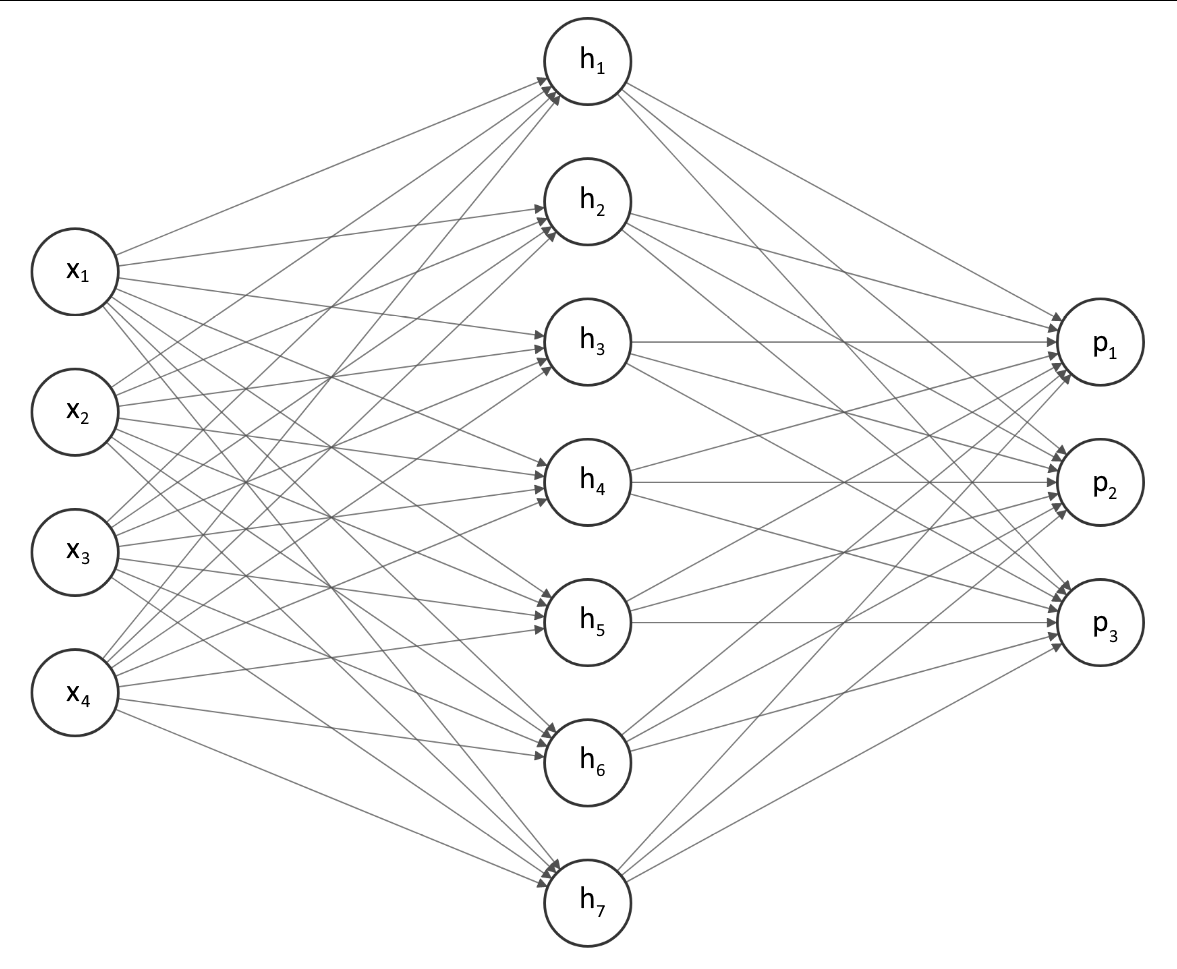

Mamy tu 3 warstwy: wejściową (4 neurony dla danych wejściowych), ukrytą (7 neuronów) oraz wyjściową (3 neurony). W ostatniej warstwie mamy 3 neurony, które posłużą nam do predykcji jednego z trzech typów kwiatów.

Jak widać, każdy neuron z jednej warstwy jest połączony z każdym neuronem kolejnej warstwy; jest to przykład tzw. gęstej sieci (ang. *dense network*). W konsekwencji mamy mnóstwo połączeń między neuronami, czyli bardzo dużo wag do ustawienia. Do ich oznaczenia zastosujemy notację $w_{i,j}^{(k)}$, gdzie $k$ oznacza numer warstwy, z której wychodzą połaczenia (1 dla warstwy wejściowej; 2 dla warstwy ukrytej), $i$ oznacza numer neuronu z warstwy wychodzącej, a $j$ oznacza numer neuronu z warstwy przychodzącej.

Spójrzmy na poniższe trzy przykłady ilustrujące notację wag:


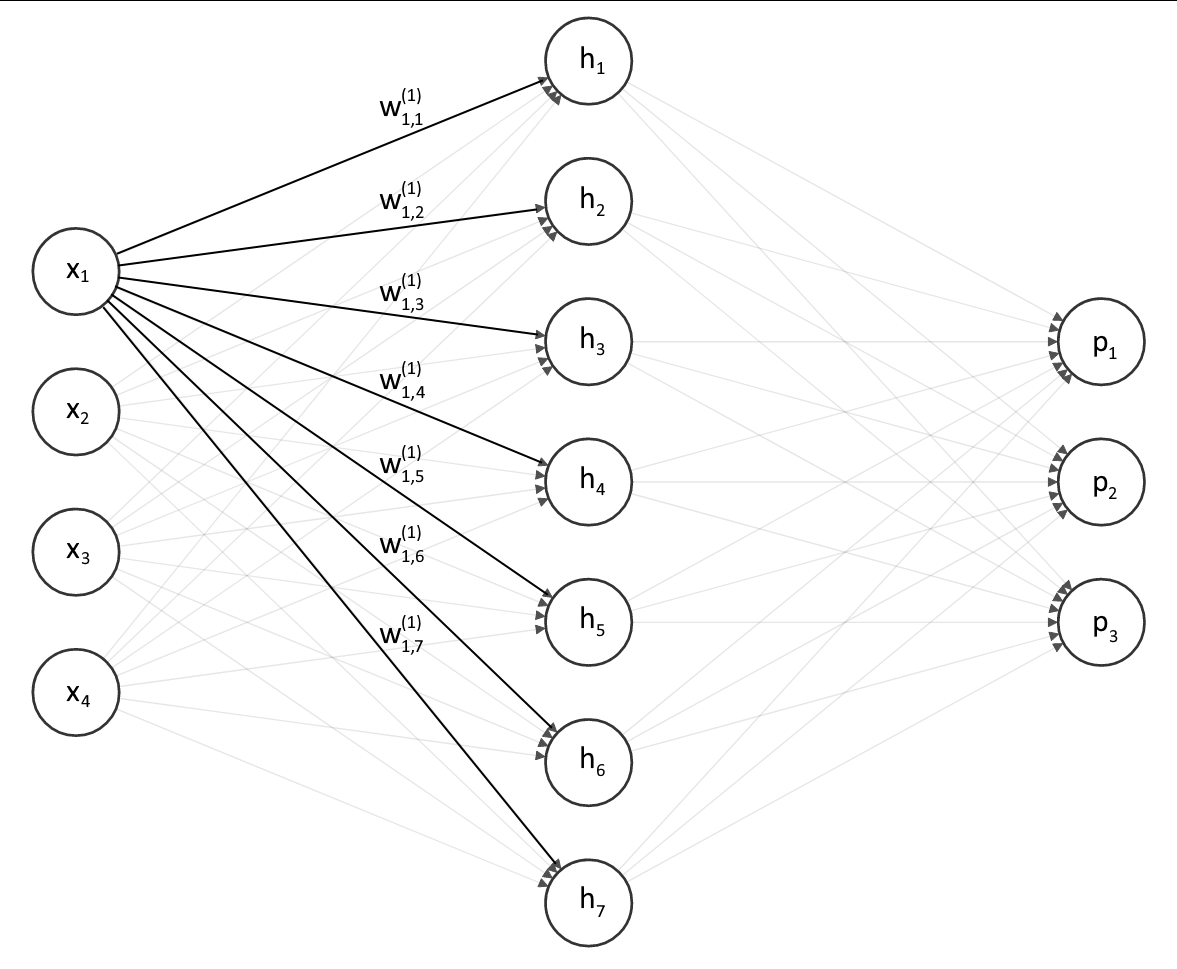


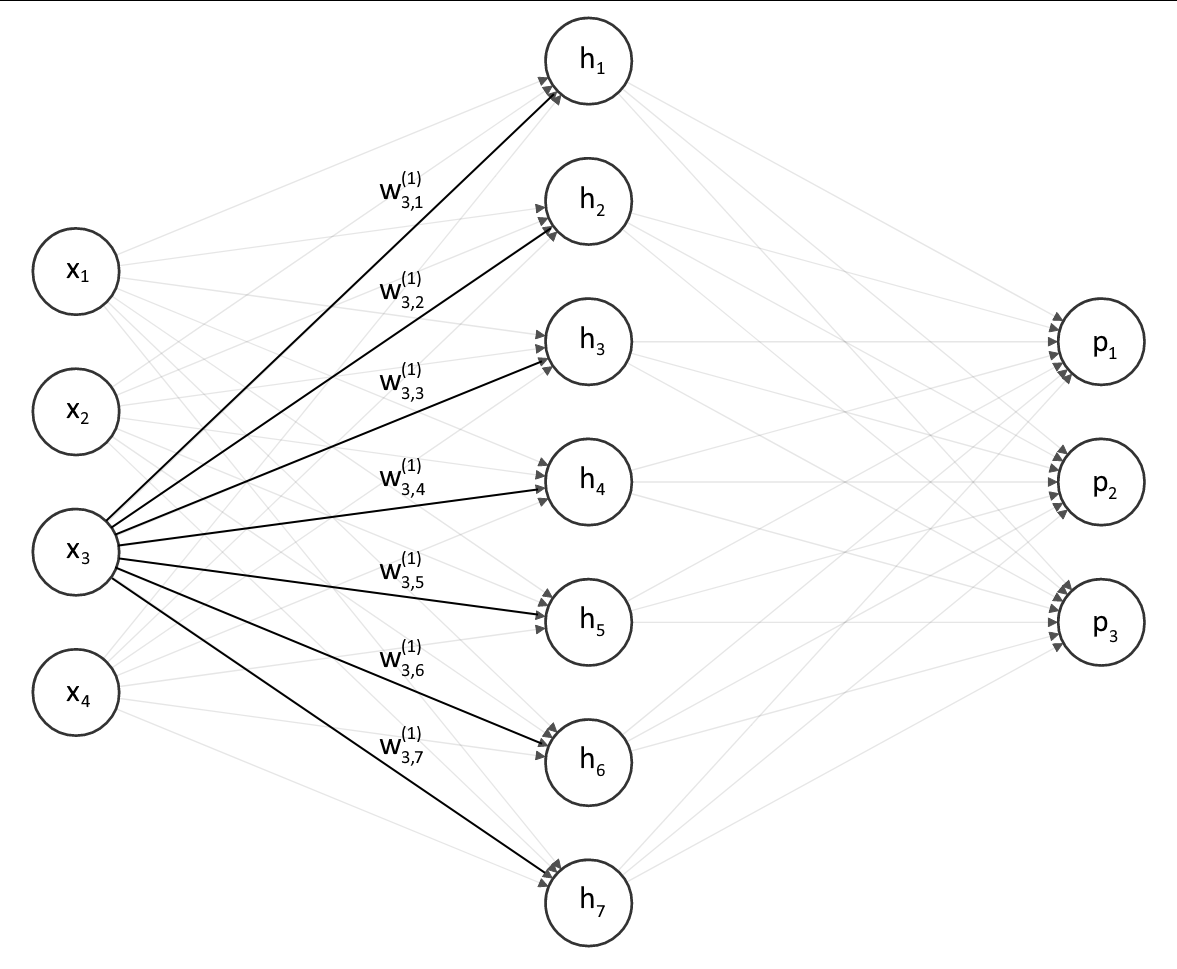


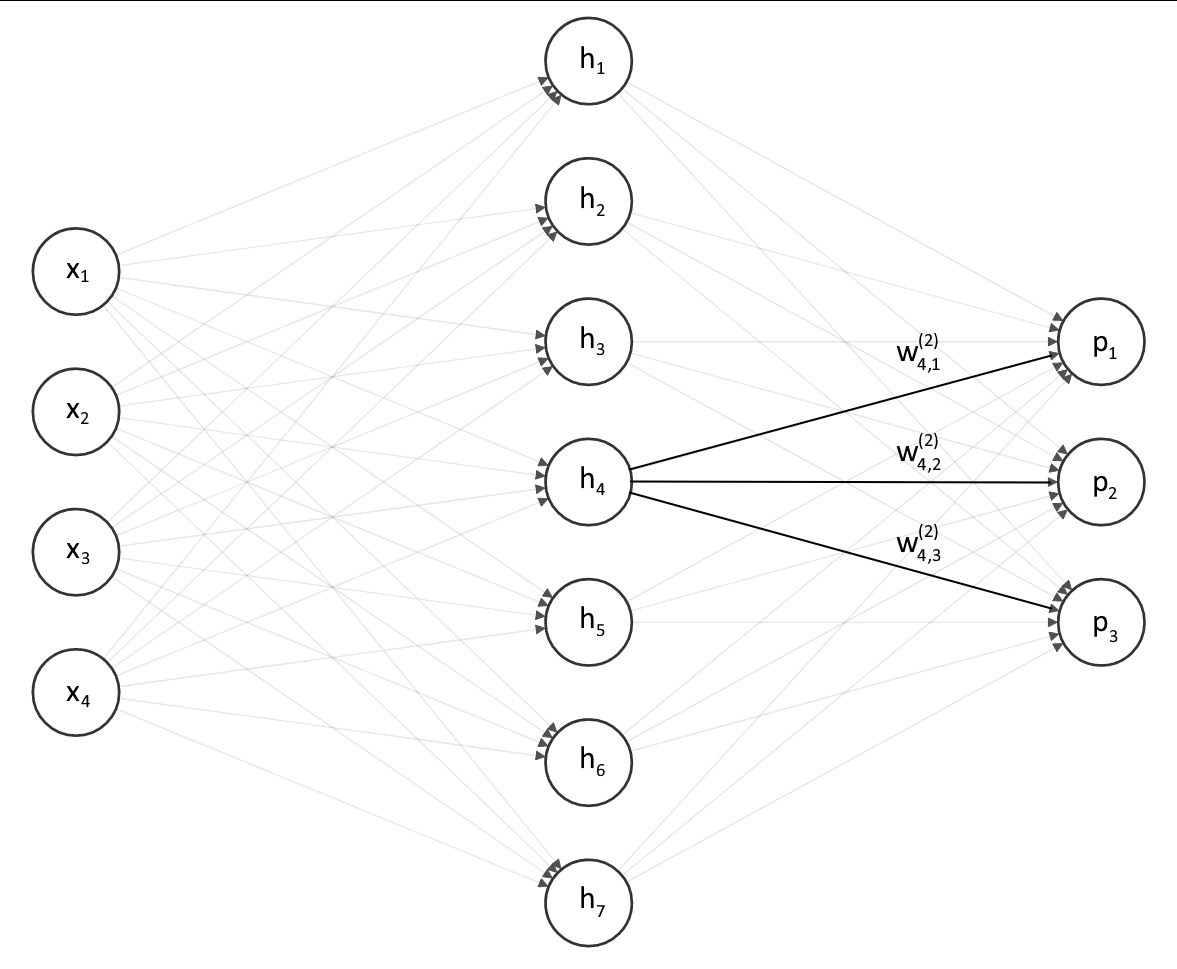

Nasze dane wejściowe opisujące kwiat możemy przedstawić jako wektor wierszowy:

$x = \begin{bmatrix}
x_1 & x_2 & x_3 & x_4
\end{bmatrix}$

Do obliczenia wartości neuronów $h_i$ w warstwie ukrytej przy użyciu pewnej funkcji aktywacji $f_1$ możemy to zrealizować analogicznie do tego, co widzieliśmy w przypadku pojedynczego perceptrona:

$h_1 = f_1 ( x_1 \cdot w^{(1)}_{1,1} + x_2 \cdot w^{(1)}_{2,1} + x_3 \cdot w^{(1)}_{3,1} + x_4 \cdot w^{(1)}_{4,1} )$

...

$h_7 = f_1 ( x_1 \cdot w^{(1)}_{1,7} + x_2 \cdot w^{(1)}_{2,7} + x_3 \cdot w^{(1)}_{3,7} + x_4 \cdot w^{(1)}_{4,7} )$

Możemy jednak przedstawić te operacje nieco inaczej. Stwórzmy macierz wag $W_1$:

$W_1 = \begin{bmatrix}
w^{(1)}_{1,1} & w^{(1)}_{1,2} & w^{(1)}_{1,3} & w^{(1)}_{1,4} & w^{(1)}_{1,5} & w^{(1)}_{1,6} & w^{(1)}_{1,7}\\
w^{(1)}_{2,1} & w^{(1)}_{2,2} & w^{(1)}_{2,3} & w^{(1)}_{2,4} & w^{(1)}_{2,5} & w^{(1)}_{2,6} & w^{(1)}_{2,7}\\
w^{(1)}_{3,1} & w^{(1)}_{3,2} & w^{(1)}_{3,3} & w^{(1)}_{3,4} & w^{(1)}_{3,5} & w^{(1)}_{3,6} & w^{(1)}_{3,7}\\
w^{(1)}_{4,1} & w^{(1)}_{4,2} & w^{(1)}_{4,3} & w^{(1)}_{4,4} & w^{(1)}_{4,5} & w^{(1)}_{4,6} & w^{(1)}_{4,7}
\end{bmatrix}$

Zakładając, że funkcja $f_1$ jest zwektoryzowana, to aby policzyć wszystkie elementy $h_i$ możemy to przedstawić przy pomocy mnożenia wektor-macierz:

$h = f_1(x W_1)$

Z kolei do obliczenia wartości w ostatniej warstwie użyjemy następującej macierzy wag $W_2$:

$W_2 = \begin{bmatrix}
w^{(2)}_{1,1} & w^{(2)}_{1,2} & w^{(2)}_{1,3}\\
w^{(2)}_{2,1} & w^{(2)}_{2,2} & w^{(2)}_{2,3}\\
w^{(2)}_{3,1} & w^{(2)}_{3,2} & w^{(2)}_{3,3}\\
w^{(2)}_{4,1} & w^{(2)}_{4,2} & w^{(2)}_{4,3}\\
w^{(2)}_{5,1} & w^{(2)}_{5,2} & w^{(2)}_{5,3}\\
w^{(2)}_{6,1} & w^{(2)}_{6,2} & w^{(2)}_{6,3}\\
w^{(2)}_{7,1} & w^{(2)}_{7,2} & w^{(2)}_{7,3}
\end{bmatrix}$

Analogicznie wyniki dla ostatniej warstwy możemy obliczyć przy pomocy pewnej funkcji aktywacji $f_2$ jako:

$p = f_2(h W_2)$

Pozostaje kwestia definicji funkcji $f_1$ i $f_2$ oraz tego jak interpretować końcowe wyniki – nie jest to kluczowe w tym momencie, ale zajmiemy się tym podczas implementacji sieci.

##### Zadanie 5 (0.2 pkt.)

Na początek wczytaj trzy wiersze danych `x1`, `x2` i `x3`, które stanowią odpowiednio pierwszy (indeks `0`), pięćdziesiąty pierwszy (indeks `50`) i sto pierwszy (indeks `100`) wiersz z macierzy danych `iris_X`. Zwróć uwagę, by zmienne `x1`, `x2` i `x3` były wymiaru `(1, 4)`. W zmiennych `y1`, `y2` i `y3` umieść odpowiadające im informacje o typie kwiatu.

Przykładowe przypadki testowe, które powinien przejść Twój kod:

| Przypadek testowy | Oczekiwany wynik |
| ----------------- | ---------------- |
| `print(x1)` | `[[5.1 3.5 1.4 0.2]]` |
| `print(x2)` | `[[7.  3.2 4.7 1.4]]` |
| `print(x3)` | `[[6.3 3.3 6.  2.5]]` |
| `print(y1)` | `0` |
| `print(y2)` | `1` |
| `print(y3)` | `2` |

In [ ]:
# UMIEŚĆ SWÓJ KOD TUTAJ


##### Zadanie 6 (0.2 pkt.)

Stwórz macierze wag `W1` i `W2` losowych wartościach z zakresu $[-0.5; 0.5)$.

Przykładowe przypadki testowe, które powinien przejść Twój kod:

```python
print(W1)
```

Oczekiwany wynik:

```plaintext
[[-0.20720321 -0.05154726  0.0413953   0.1446531   0.19952104 -0.11756198 -0.42389697]
 [ 0.47610701 -0.14478546 -0.12273341  0.33137789  0.00895781 -0.16036614 -0.05154593]
 [-0.4986094  -0.2502562   0.33555781  0.45074342  0.02542555 -0.46374871 -0.12301552]
 [-0.05374151 -0.48399166  0.25081051  0.1645003  -0.37812536 -0.00054519 -0.49206465]]
```

```python
print(W2)
```

Oczekiwany wynik:

```plaintext
[[ 0.13003883 -0.47917185  0.00191843]
 [-0.0244591   0.28216438 -0.45483746]
 [-0.40707957 -0.48781446 -0.22313331]
 [ 0.29127116 -0.02671459  0.21063396]
 [-0.28394952  0.3335106  -0.16159164]
 [ 0.11988442  0.4876643   0.09407734]
 [-0.16150158 -0.15421231 -0.4044014 ]]
```

In [ ]:
rng = np.random.default_rng(seed=1336)

# UMIEŚĆ SWÓJ KOD TUTAJ


##### Zadanie 7 (0.2 pkt.)

Dla `x1` oblicz wynik dla warstwy ukrytej, tj. najpierw oblicz i wyświetl `z1` będącego wynikiem mnożenia `x1` i `W1`.

Następnie oblicz `h` używając funkcji aktywacji [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)), która *de facto* jest funkcją w postaci $\max(a, 0)$ (możesz użyć [`np.maximum()`](https://numpy.org/doc/stable/reference/generated/numpy.maximum.html)).

Przykładowe przypadki testowe, które powinien przejść Twój kod:

| Przypadek testowy | Oczekiwany wynik |
| ----------------- | ---------------- |
| `print(z1)` | <code>[[-0.09916328&nbsp;-1.21679718&nbsp;&nbsp;0.30149212&nbsp;&nbsp;2.56149428&nbsp;&nbsp;1.00888036&nbsp;-1.81020483&nbsp;-2.61291996]]</code> |
| `print(z1.shape)` | `(1, 7)` |
| `print(h)` | <code>[[0.&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;0.&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;0.30149212&nbsp;2.56149428&nbsp;1.00888036&nbsp;0.&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;0.&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;]]</code> |
| `print(h.shape)` | `(1, 7)` |

In [ ]:
# UMIEŚĆ SWÓJ KOD TUTAJ


##### Zadanie 8 (0.2 pkt.)

Oblicz wynik dla warstwy wyjściowej, tj. najpierw oblicz `z2` będącej wynikiem mnożenia `h` i `W2`.

Jako funkcji aktywacji użyj funkcji [softmax](https://en.wikipedia.org/wiki/Softmax_function); możesz użyć poniższej implementacji lub tej, której dostarcza pakiet [Scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.softmax.html); wynik zapisz w zmiennej `y1_pred` (na diagramie sieci odpowiada to neuronom $p_i$).

Dzięki użyciu funkcji softmax wyniki zawarte w `y1_pred` mogą być teraz interpretowane jako prawdopodobieństwo przynależności do danego typu kwiatu (kolejno według pozycji, 0, 1 i 2). Wybierz najbardziej prawdopodobny typ przy pomocy metody `argmax()` i zapisz w zmiennej `y1_hat`.

Otrzymany wynik predykcji w `y1_hat` porównamy z wczytaną wcześniej zawartością `y1`.

Przykładowe przypadki testowe, które powinien przejść Twój kod:

| Przypadek testowy | Oczekiwany wynik |
| ----------------- | ---------------- |
| `print(z2)` | `[[0.33688703 0.12097081 0.30923812]]` |
| `print(y1_pred)` | `[[0.3599022 0.2900102 0.3500876]]` |
| `print(y1_hat)` | `[0]` |
| `print(y1)` | `0` |
| `print('Poprawna predykcja?', y1_hat[0] == y1)` | `True` |

In [ ]:
def softmax(x, axis=None):
    exp_x = np.exp(x - np.max(x, keepdims=True))
    return exp_x / exp_x.sum(axis=axis, keepdims=True)

# UMIEŚĆ SWÓJ KOD TUTAJ


#### Jednoczesna predykcja dla wielu danych wejściowych

Jeżeli chcemy obliczyć predykcje jednocześnie dla wielu danych wejściowych, to możemy to zrealizować poprzez poniższe obliczenia macierzowe:

$X = \begin{bmatrix}
x_{1,1} & x_{1,2} & x_{1,3} & x_{1,4}\\
x_{2,1} & x_{2,2} & x_{2,3} & x_{2,4}\\
x_{3,1} & x_{3,2} & x_{3,3} & x_{3,4}\\
\dots & \dots & \dots & \dots
\end{bmatrix}$

$H = f_1(X W_1)$

$P = f_2(H W_2)$

##### Zadanie 9 (0.2 pkt.)

Utwórz zmienne `X` i `Y` dla pozycji w danych zbioru Iris o indeksach 0, 1, 50, 51, 100 i 101 zawierają odpowiednio dane opisujące poszczególne kwiaty oraz typy tych kwiatów.

Przykładowe przypadki testowe, które powinien przejść Twój kod:

| Przypadek testowy | Oczekiwany wynik |
| ----------------- | ---------------- |
| `print(X)` | <code>[[5.1&nbsp;3.5&nbsp;1.4&nbsp;0.2]<br>&nbsp;[4.9&nbsp;3.&nbsp;&nbsp;1.4&nbsp;0.2]<br>&nbsp;[7.&nbsp;&nbsp;3.2&nbsp;4.7&nbsp;1.4]<br>&nbsp;[6.4&nbsp;3.2&nbsp;4.5&nbsp;1.5]<br>&nbsp;[6.3&nbsp;3.3&nbsp;6.&nbsp;&nbsp;2.5]<br>&nbsp;[5.8&nbsp;2.7&nbsp;5.1&nbsp;1.9]]</code> |
| `print(X.shape)` | `(6, 4)` |
| `print(Y)` | `[0 0 1 1 2 2]` |
| `print(Y.shape)` | `(6,)` |

In [ ]:
# UMIEŚĆ SWÓJ KOD TUTAJ


##### Zadanie 10 (0.2 pkt.)

Wykorzystując dane wejściowe `X` i wagi `W1` oblicz wynik pośredni `Z1` dla warstwy ukrytej. Następnie zastosuj funkcję aktywacji ReLU do obliczenia `H`.

Przykładowe przypadki testowe, które powinien przejść Twój kod:

```python
print(Z1)
```

Oczekiwany wynik:

```plaintext
[[-0.09916328 -1.21679718  0.30149212  2.56149428  1.00888036 -1.81020483 -2.61291996]
 [-0.29577614 -1.134095    0.35457976  2.36687471  0.96449724 -1.70650936 -2.50236761]
 [-2.34558231 -2.67793679  1.82527657  4.42177545  1.01543687 -3.51648773 -4.39928922]
 [-2.12691266 -2.64535636  1.75840889  4.26128494  0.85282659 -3.35325531 -4.1695544 ]
 [-2.86023725 -3.51405614  2.49614323  5.12057285  0.49378323 -4.05370399 -4.80890722]
 [-2.56130649 -2.88578565  2.0965973   4.3450503   0.59264025 -3.48100236 -4.16007842]]
```

```python
print(H)
```

Oczekiwany wynik:

```plaintext
[[0.         0.         0.30149212 2.56149428 1.00888036 0.         0.        ]
 [0.         0.         0.35457976 2.36687471 0.96449724 0.         0.        ]
 [0.         0.         1.82527657 4.42177545 1.01543687 0.         0.        ]
 [0.         0.         1.75840889 4.26128494 0.85282659 0.         0.        ]
 [0.         0.         2.49614323 5.12057285 0.49378323 0.         0.        ]
 [0.         0.         2.0965973  4.3450503  0.59264025 0.         0.        ]]
```

In [ ]:
# UMIEŚĆ SWÓJ KOD TUTAJ


##### Zadanie 11 (0.3 pkt.)

Wykorzystując `H` i `W2` oblicz wynik pośredni `Z2` dla warstwy wyjściowej. Użyj funkcji softmax to obliczenia predykcji `Y_pred` (opisywaliśmy to wcześniej jako $P$). Ostatecznie oblicz najbardziej prawdopodobne typy kwiatów i zapisz dane w zmiennej `Y_hat`.

Otrzymany wynik predykcji w `Y_hat` porównamy z wczytaną wcześniej zawartością `Y`.

Przykładowe przypadki testowe, które powinien przejść Twój kod:

```python
print(Z2)
```

Oczekiwany wynik:

```plaintext
[[ 0.33688703  0.12097081  0.30923813]
 [ 0.27119163  0.08547084  0.26357096]
 [ 0.25657004 -0.66986326  0.36000998]
 [ 0.28321736 -0.68718904  0.3674021 ]
 [ 0.33513676 -1.18976681  0.44180262]
 [ 0.24382599 -0.9411749   0.35162877]]
```

```python
print(Y_pred)
```

Oczekiwany wynik:

```plaintext
[[0.3599022  0.2900102  0.3500876 ]
 [0.35424391 0.2942015  0.35155459]
 [0.39921073 0.15807287 0.4427164 ]
 [0.40539026 0.15361413 0.44099562]
 [0.42914689 0.0934004  0.47745271]
 [0.4132959  0.12636353 0.46034057]]
```

```python
print(Y_hat)
print(Y)
print('Poprawne predykcje?', Y_hat == Y)
```

Oczekiwany wynik:

```plaintext
[0 0 2 2 2 2]
[0 0 1 1 2 2]
Poprawne predykcje? [ True  True False False  True  True]
```

In [ ]:
# UMIEŚĆ SWÓJ KOD TUTAJ


##### Zadanie 12 (0.7 pkt.)

Mamy teraz wszystkie elementy, które pozwolą nam zebrać w jednym miejscu obliczenia realizowane podczas predykcji modelu sieci neuronowej. Zaimplementuj funkcję `my_nn()`, która dla zadanych macierzy wag oraz macierzy z danymi wejściowymi zwróci predykcje typów kwiatów.

Przykładowe przypadki testowe, które powinien przejść Twój kod:

| Przypadek testowy | Oczekiwany wynik |
| ----------------- | ---------------- |
| `print(my_nn(W1, W2, X))` | `[0 0 2 2 2 2]` |

In [ ]:
def my_nn(_W1, _W2, _X):
    # UMIEŚĆ SWÓJ KOD TUTAJ
    
    return None

#### Opcjonalnie: odtworzenie wyników w TensorFlow

Możemy teraz spróbować odtworzyć nasze wyniki w bibliotece [TensorFlow](https://www.tensorflow.org), jednej z najpopularniejszych bibliotek używanej do trenowania głębokich sieci neuronowych. Bibliotekę instaluje się w [wirtualnym środowisku](https://docs.python.org/3/library/venv.html) poprzez menedżer `pip` poleceniem `pip install tensorflow`. Poniżej znajduje się skrypt, który tworzy taką samą sieć neuronową, którą przed chwilą utworzyliśmy ręcznie. Możesz porównać uzyskane wyniki (w szczególności wartość zmiennej `Y_pred`), które powinny być takie same.

Uwaga: załadowanie biblioteki TensorFlow oraz utworzenie modelu może spowodować wyświetlenie dużej ilości informacji diagnostycznych.

```python
# Wczytanie danych

from sklearn.datasets import load_iris
iris_X, iris_Y = load_iris(return_X_y=True)

# TODO: tutaj wstaw rozwiązanie zadania 16

# Stworzenie modelu sieci neuronowej

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

model = Sequential([
    Input((4,)),
    Dense(7, activation='relu', use_bias=False),
    Dense(3, activation='softmax', use_bias=False)
])

# Wygenerowanie wag

import numpy as np

rng = np.random.default_rng(seed=1336)

# TODO: tutaj wstaw rozwiązanie zadania 13

# Wstawienie wag do modelu

model.layers[0].set_weights([W1])
model.layers[1].set_weights([W2])

# Predykcja

Y_pred = model.predict(X)
print(Y_pred)
print(Y_pred.argmax(axis=1), Y)
```

TensorFlow zajmuje dość sporo miejsca na dysku, więc po zakończonej pracy możemy odinstalować bibliotekę poleceniem `pip uninstall tensorflow` lub po poleceniu `deactivate` można też usunąć całe środowisko wirtualne.